
<h1 align="center"> Statistics and Financial Data Analysis
<h1 align="center"> Examples


In [1]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import scipy as sp
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
np.random.seed(17)

mu = 0
std = 0.4

a = 2
b = 0.5

# Create random variable from distribution used
rv = stats.norm(mu,std)
n = 200
    
def f(x,a,b,rv):
    n = x.size
    y = np.zeros(n)
    y_data = np.zeros(n)
    z = rv.rvs(size = n)
    for i in range(n):
        y_data[i] = a*x[i]+b + 10*z[i]
        y[i] = a*x[i]+b 
    return y_data,y

In [3]:
x = np.linspace(0,10, n)
yd,y = f(x,a,b,rv)

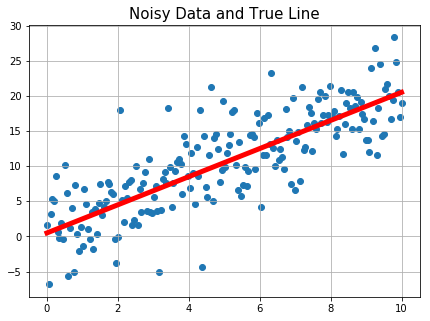

In [4]:
plt.figure(1, figsize=(7,5)) 
plt.scatter(x,yd)
plt.plot(x,y,'r',linewidth= 5)
plt.title('Noisy Data and True Line', fontsize = 15)
plt.grid()

In [5]:
import statsmodels.api as sm

X = x
yd = yd
Xnew = sm.add_constant(X)
model = sm.OLS(yd, Xnew).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     367.1
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           5.66e-47
Time:                        10:12:40   Log-Likelihood:                -568.70
No. Observations:                 200   AIC:                             1141.
Df Residuals:                     198   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9864      0.589      1.676      0.095      -0.174       2.147
x1             1.9507      0.102     19.161      0.000       1.750       2.151
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.694
Skew:                           0.023   Prob(JB):                        0.158
Kurtosis:                       3.664   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from sklearn.linear_model import Ridge
y = yd
X = x.reshape(-1,1)
clf = Ridge(alpha=0.5)
test = clf.fit(X, y)
test.get_params(True)
ypred = test.predict(X)


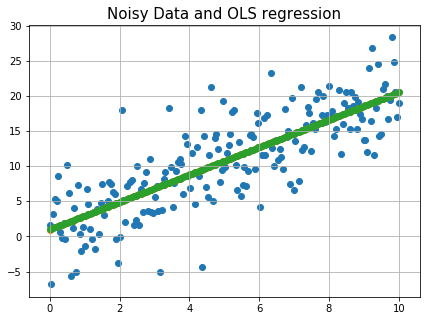

In [7]:
yfit = model.fittedvalues
plt.figure(1, figsize=(7,5)) 
plt.scatter(x,yd)
plt.scatter(x,yfit)
plt.scatter(x,ypred)
plt.title('Noisy Data and OLS regression', fontsize = 15)
plt.grid()

In [8]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [10]:
# Example taken from Hands on Machine Learning, chapter 4.

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("r-", "g--", "c:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),])
        
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 5 if alpha > 0 else 5
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\lambda = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

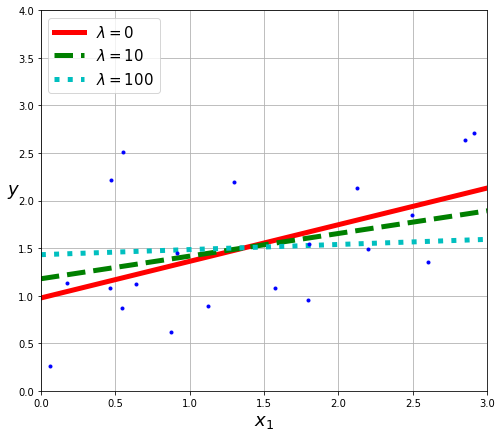

In [11]:
plt.figure(figsize=(8,7))
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.savefig("Effect of hyperparameter lambda")

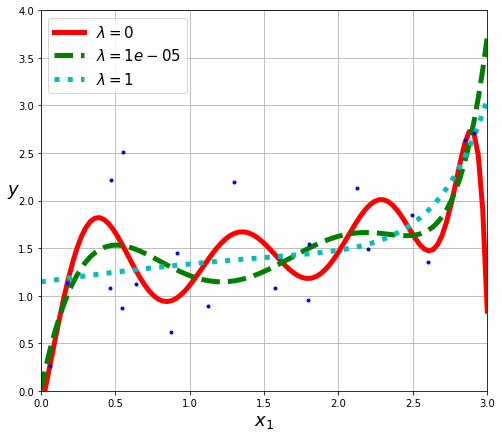

In [12]:

plt.figure(figsize=(8,7))
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.grid()
plt.savefig("Ridge_polyFeatures")



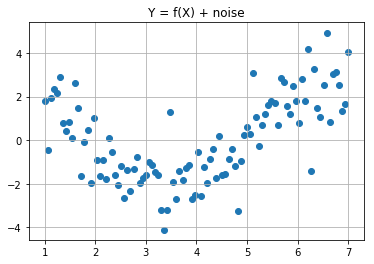

In [44]:
x = np.linspace(1,7,100)
np.random.seed(17) 
y = 0.5*np.sin(x)+2*np.cos(x) + np.random.normal(0,1,len(x))
plt.scatter(x,y)
plt.grid()
plt.title("Y = f(X) + noise")
plt.savefig("RidgeExample2")

In [14]:
x1 = np.array([1,2,3,4])
xpoly = np.polynomial.polynomial.polyvander(x1,2)
xpoly.shape

(4, 3)

In [15]:
xpoly

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [16]:
xpoly = np.polynomial.polynomial.polyvander(x,15)
xpoly.shape

(100, 16)

In [17]:
n = 20
dmatrix = []
for i in range(1, n):    
    dmatrix.append(np.polynomial.polynomial.polyvander(x,i))

selectModel = np.array([0,2,10,12,14,18])
print(len(selectModel))
listPlots = [231,232,233,234,235,236]
listPlots[0]

len(dmatrix)

6


19

In [45]:
from sklearn.linear_model import LinearRegression

def my_lr(y,dmatrix, selectModel,listPlt):
    plt.figure(figsize=(12,8))    
    m = len(selectModel)
    modRSS =[]
    betas = []

    for i in range(m):
       
        X = dmatrix[selectModel[i]]
        linreg = LinearRegression(normalize=True)
        linreg.fit(X,y)   
        ypred = linreg.predict(X)
        
        
        plt.subplot(listPlt[i])
        plt.tight_layout()
        plt.plot(x,ypred,linewidth= 3, color = 'red')
        plt.scatter(x,y)
        plt.grid()
        deg = selectModel[i]+1
        plt.title('Poly degree %d'%deg)

        sumResid = sum((ypred-y)**2)
        modRSS.append(sumResid)
        modBeta = [linreg.coef_, linreg.intercept_]
        betas.append(modBeta)

    plt.savefig("RidgeExample_OLSPoly")
    return modRSS, betas

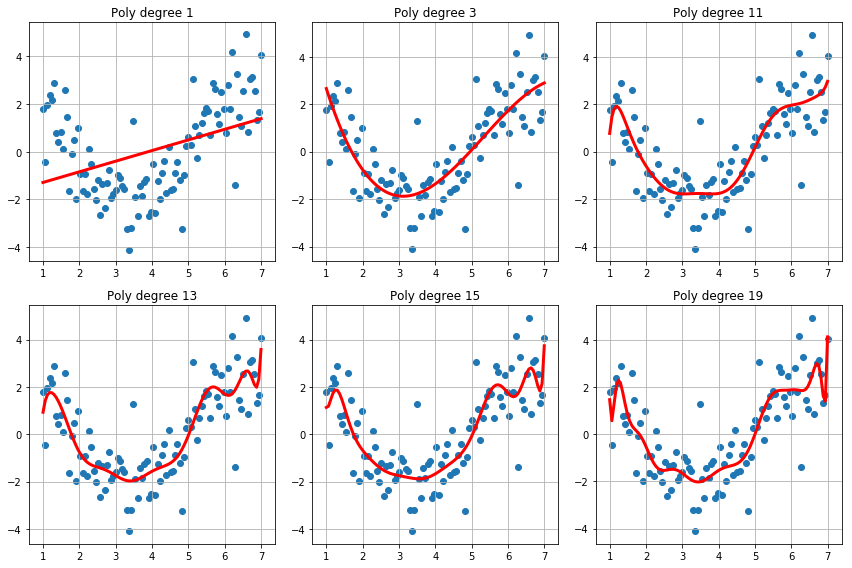

In [46]:
error, betas = my_lr(y,dmatrix, selectModel,listPlots)

In [20]:
error

[312.1293872300214,
 129.92339644734378,
 116.36699462869518,
 112.21979241731718,
 111.28414159089417,
 107.07959192050255]

In [21]:
names = ['Poly 1','Poly 3','Poly 11','Poly 13','Poly 15','Poly 19'] 
col = [betas[0][0], betas[1][0], betas[2][0],betas[3][0],betas[4][0],betas[5][0]]
myIndex = ['coef%d'%i for i in range(0,20)]
testError = myDict = dict(zip(names, error))

myDict = dict(zip(names, col))
df_new = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_new['Coeff'] = myIndex
df_new = df_new.set_index('Coeff')
df_new

,Poly 1,Poly 3,Poly 11,Poly 13,Poly 15,Poly 19
Coeff,,,,,,
coef0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
coef1,0.445663,-8.177182,1785.597204,6395.612387,-30319.141460,-6.944063e+05
coef2,NaN,1.856378,-2970.169678,-14479.701152,73125.486134,1.981623e+06
coef3,NaN,-0.116396,2852.772011,19408.629491,-104785.259944,-3.424452e+06
coef4,NaN,NaN,-1762.405123,-17125.086198,99958.174691,4.014145e+06
coef5,NaN,NaN,735.510623,10481.272225,-67356.700032,-3.385960e+06
coef6,NaN,NaN,-211.620369,-4575.622300,33168.945075,2.125519e+06
coef7,NaN,NaN,42.003799,1443.514735,-12168.233504,-1.011284e+06
coef8,NaN,NaN,-5.643072,-329.549560,3355.747844,3.669014e+05


In [22]:
testError 

{'Poly 1': 312.1293872300214,
 'Poly 3': 129.92339644734378,
 'Poly 11': 116.36699462869518,
 'Poly 13': 112.21979241731718,
 'Poly 15': 111.28414159089417,
 'Poly 19': 107.07959192050255}

In [48]:
from sklearn.linear_model import Ridge

def my_ridge(y,dmatrix_select, listPlt, alpha):
    plt.figure(figsize=(12,8))    
    m = len(alpha)
    modRSS =[]
    betas = []

    for i in range(m):
       
        X = dmatrix_select
        ridgereg = Ridge(alpha = alpha[i], normalize=True)
        ridgereg.fit(X,y)   
        ypred = ridgereg.predict(X)
        
        
        plt.subplot(listPlt[i])
        plt.tight_layout()
        plt.plot(x,ypred,linewidth= 3, color = 'red')
        plt.scatter(x,y)
        plt.grid()
        deg = selectModel[i]+1
        plt.title('Alpha %f'%alpha[i])

        sumResid = sum((ypred-y)**2)
        modRSS.append(sumResid)
        modBeta = [ridgereg.coef_, ridgereg.intercept_]
        betas.append(modBeta)

    plt.savefig("RidgeExample_Poly19")
    return modRSS, betas

In [49]:
alpha = [0,0.001,0.1,0.25,2,50]
alpha[5]

50

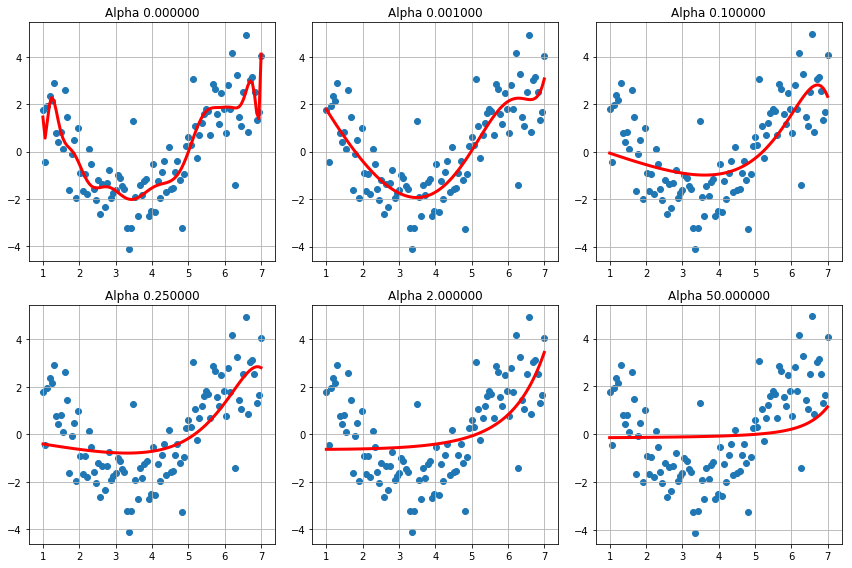

In [50]:
error, betas = my_ridge(y,dmatrix[-1], listPlots, alpha)

In [26]:
names = ['Alpha %f'%alpha[0],'Alpha %f'%alpha[1],'Alpha %f'%alpha[2],'Alpha %f'%alpha[3],'Alpha %f'%alpha[4],'Alpha %f'%alpha[5]] 
col = [betas[0][0], betas[1][0], betas[2][0],betas[3][0],betas[4][0],betas[5][0]]
myIndex = ['coef%d'%i for i in range(0,20)]
testError = myDict = dict(zip(names, error))
myDict = dict(zip(names, col))
df_new = pd.DataFrame({ key:pd.Series(value) for key, value in myDict.items()})
df_new['Coeff'] = myIndex
df_new = df_new.set_index('Coeff')
df_new

,Alpha 0.000000,Alpha 0.001000,Alpha 0.100000,Alpha 0.250000,Alpha 2.000000,Alpha 50.000000
Coeff,,,,,,
coef0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
coef1,-6.944063e+05,-2.730587e+00,-5.285526e-01,-2.579581e-01,-5.030605e-03,6.451230e-03
coef2,1.981623e+06,8.579885e-02,-1.361758e-03,8.637136e-04,4.512304e-03,1.076327e-03
coef3,-3.424452e+06,3.101818e-02,4.277223e-03,2.552422e-03,1.029802e-03,1.764382e-04
coef4,4.014145e+06,4.190000e-03,8.500491e-04,5.132213e-04,1.730984e-04,2.750153e-05
coef5,-3.385960e+06,4.017174e-04,1.238478e-04,7.793340e-05,2.577073e-05,4.138044e-06
coef6,2.125519e+06,2.451425e-05,1.566252e-05,1.044283e-05,3.595077e-06,6.088493e-07
coef7,-1.011284e+06,-6.751459e-07,1.792930e-06,1.291139e-06,4.814685e-07,8.832711e-08
coef8,3.669014e+05,-5.519080e-07,1.858364e-07,1.490763e-07,6.264084e-08,1.269930e-08


Text(0.5, 1.0, 'Shrunk coeff as fn of Lambda')

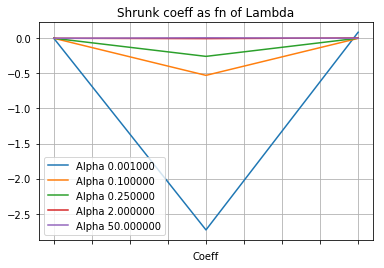

In [52]:
names2 = ['Alpha %f'%alpha[1],'Alpha %f'%alpha[2],'Alpha %f'%alpha[3],'Alpha %f'%alpha[4],'Alpha %f'%alpha[5]] 

df_new[names2][0:3].plot()
plt.grid()
plt.title("Shrunk coeff as fn of Lambda")

In [28]:
testError

{'Alpha 0.000000': 107.06563928353572,
 'Alpha 0.001000': 122.25686587232987,
 'Alpha 0.100000': 183.82475471659706,
 'Alpha 0.250000': 205.9049074548884,
 'Alpha 2.000000': 244.27241858029524,
 'Alpha 50.000000': 320.27388851806813}